#Exploratory Data Analysis (EDA)

Explore.py

In [ ]:
# @title
#import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-colorblind')

# 2018.11.07 Created by Eamon.Zhang


def get_dtypes(data,drop_col=[]):
    """Return the dtypes for each column of a pandas Dataframe

    Parameters
    ----------
    data : pandas Dataframe

    drop_col : columns to omit in a list

    Returns
    -------
    str_var_list, num_var_list, all_var_list

    """

    name_of_col = list(data.columns)
    num_var_list = []
    str_var_list = []
    all_var_list = []

    str_var_list = name_of_col.copy()
    for var in name_of_col:
        # check if column belongs to numeric type
        if (data[var].dtypes in (np.int, np.int64, np.uint, np.int32, np.float,
                               np.float64, np.float32, np.double)):
            str_var_list.remove(var)
            num_var_list.append(var)
    # drop the omit column from list
    for var in drop_col:
        if var in str_var_list:
            str_var_list.remove(var)
        if var in num_var_list:
            num_var_list.remove(var)

    all_var_list.extend(str_var_list)
    all_var_list.extend(num_var_list)
    return str_var_list, num_var_list, all_var_list


def describe(data,output_path=None):
    """output the general description of a  pandas Dataframe
       into a csv file

    """

    result = data.describe(include='all')
    if output_path is not None:
        output = os.path.join(output_path,'describe.csv')
        result.to_csv(output)
        print('result saved at:', str(output))
    return result


def discrete_var_barplot(x,y,data,output_path=None):
    """draw the barplot of a discrete variable x against y(target variable).
    By default the bar shows the mean value of y.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """

    plt.figure(figsize=(15,10))
    sns.barplot(x=x,y=y,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Barplot_'+str(x)+'_'+str(y)+'.png')
        plt.savefig(output)
        print('Image saved at', str(output))


def discrete_var_countplot(x,data,output_path=None):
    """draw the countplot of a discrete variable x.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """

    plt.figure(figsize=(15,10))
    sns.countplot(x=x,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Countplot_'+str(x)+'.png')
        plt.savefig(output)
        print('Image saved at',str(output))


def discrete_var_boxplot(x,y,data,output_path=None):
    """draw the boxplot of a discrete variable x against y.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """

    plt.figure(figsize=(15,10))
    sns.boxplot(x=x,y=y,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Boxplot_'+str(x)+'_'+str(y)+'.png')
        plt.savefig(output)
        print('Image saved at',str(output))


def continuous_var_distplot(x,output_path=None,bins=None):
    """draw the distplot of a continuous variable x.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """

    plt.figure(figsize=(15,10))
    sns.distplot(a=x,kde=False,bins=bins)
    if output_path is not None:
        output=os.path.join(output_path,'Distplot_'+str(x.name)+'.png')
        plt.savefig(output)
        print('Image saved at',str(output))


# 2018.11.28 Created by Eamon.Zhang

def scatter_plot(x,y,data,output_path=None):
    """draw the scatter-plot of two variables.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """

    plt.figure(figsize=(15,10))
    sns.scatterplot(x=x,y=y,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Scatter_plot_'+str(x.name)+'_'+str(y.name)+'.png')
        plt.savefig(output)
        print('Image saved at',str(output))


def correlation_plot(data,output_path=None):
    """draw the correlation plot between variables.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """

    corrmat = data.corr()
    fig, ax = plt.subplots()
    fig.set_size_inches(11,11)
    sns.heatmap(corrmat,cmap="YlGnBu",linewidths=.5,annot=True)
    if output_path is not None:
        output = os.path.join(output_path,'Corr_plot'+'.png')
        plt.savefig(output)
        print('Image saved at',str(output))


def heatmap(data,output_path=None,fmt='d'):
    """draw the heatmap between 2 variables.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """

    fig, ax = plt.subplots()
    fig.set_size_inches(11,11)
    sns.heatmap(data,cmap="YlGnBu",linewidths=.5,annot=True,fmt=fmt)
    if output_path is not None:
        output = os.path.join(output_path,'Heatmap'+'.png')
        plt.savefig(output)
        print('Image saved at',str(output))

<ipython-input-87-66ceea28bfba>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-colorblind')
%matplotlib inline

<ipython-input-88-447e64cea72f>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [ ]:
#I mainly followed the columns that are picked by Eamon.Zhang
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

data = pd.read_csv('/content/drive/MyDrive/Dataset/titanic.csv', usecols=use_cols)


In [ ]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250


**Descriptive Analysis**

In [ ]:
describe(data=data)

,Survived,Pclass,Sex,Age,SibSp,Fare
count,891.000000,891.000000,891,714.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.699118,0.523008,32.204208
std,0.486592,0.836071,NaN,14.526497,1.102743,49.693429
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000
25%,0.000000,2.000000,NaN,20.125000,0.000000,7.910400
50%,0.000000,3.000000,NaN,28.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,38.000000,1.000000,31.000000


In [ ]:
data.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Fare
count,891.000000,891.000000,891,714.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.699118,0.523008,32.204208
std,0.486592,0.836071,NaN,14.526497,1.102743,49.693429
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000
25%,0.000000,2.000000,NaN,20.125000,0.000000,7.910400
50%,0.000000,3.000000,NaN,28.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,38.000000,1.000000,31.000000


Descriptive Statistic for Age

In [ ]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Descriptive Statistic for Sex

In [ ]:
data['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

Descriptive Statistic for Pclass

In [ ]:
data['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

Distribution of Age

<function matplotlib.pyplot.show(close=None, block=None)>

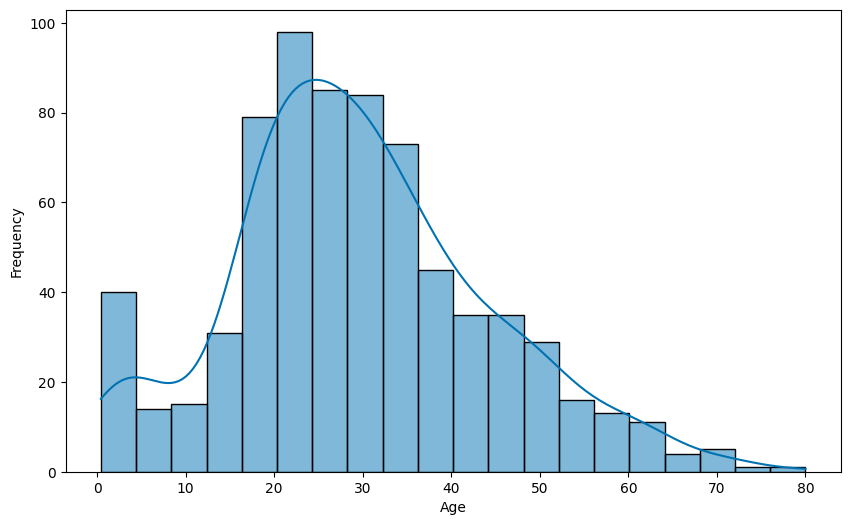

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(data=data, x = 'Age',bins=20, kde=True)
plt.ylabel('Frequency')
plt.show

Distribution of Pclass

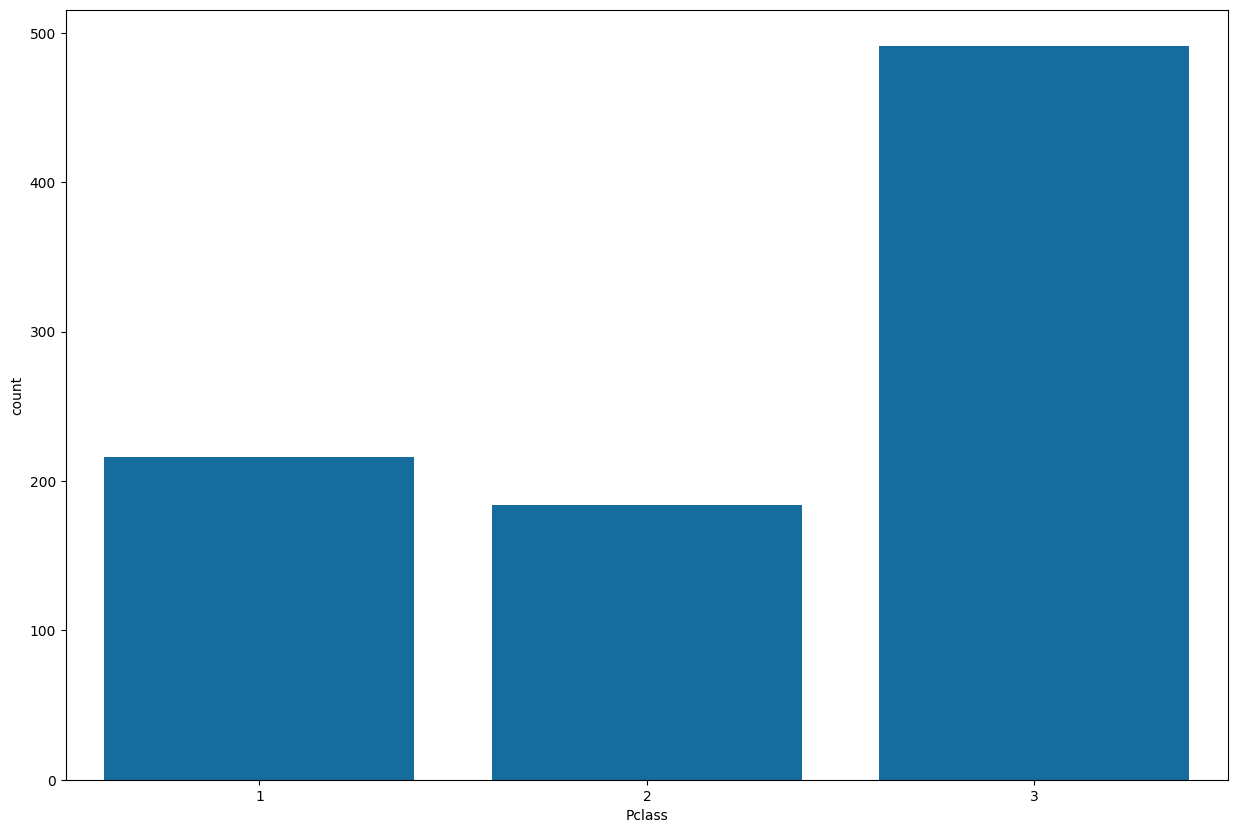

In [ ]:
discrete_var_countplot(x='Pclass',data=data)


Distribution of Sex

<function matplotlib.pyplot.show(close=None, block=None)>

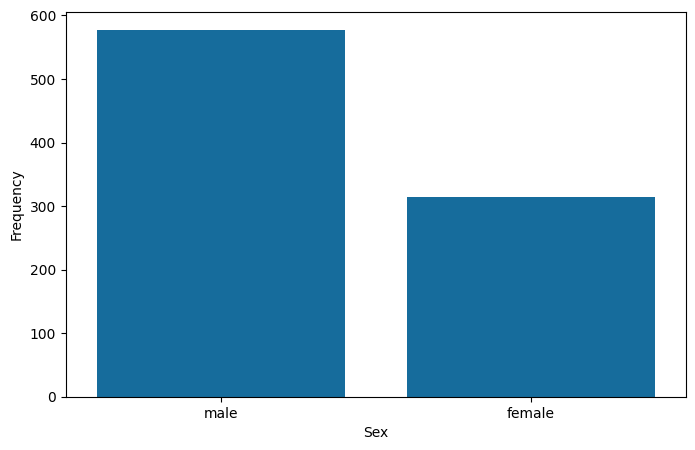

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(data=data, x = 'Sex')
plt.ylabel('Frequency')
plt.show

Count of Pclass by Survival Status

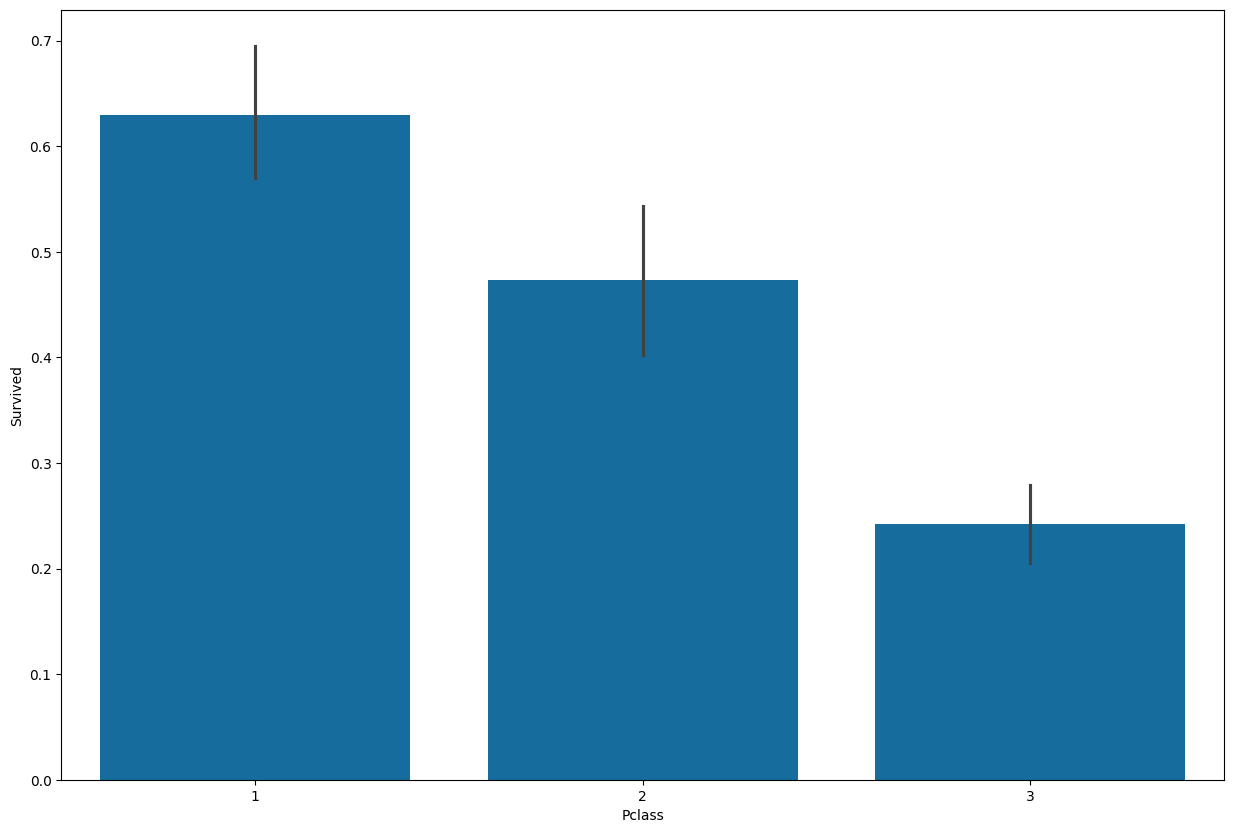

In [ ]:
discrete_var_barplot(x='Pclass',y='Survived',data=data)


Count of Fare by Pclass

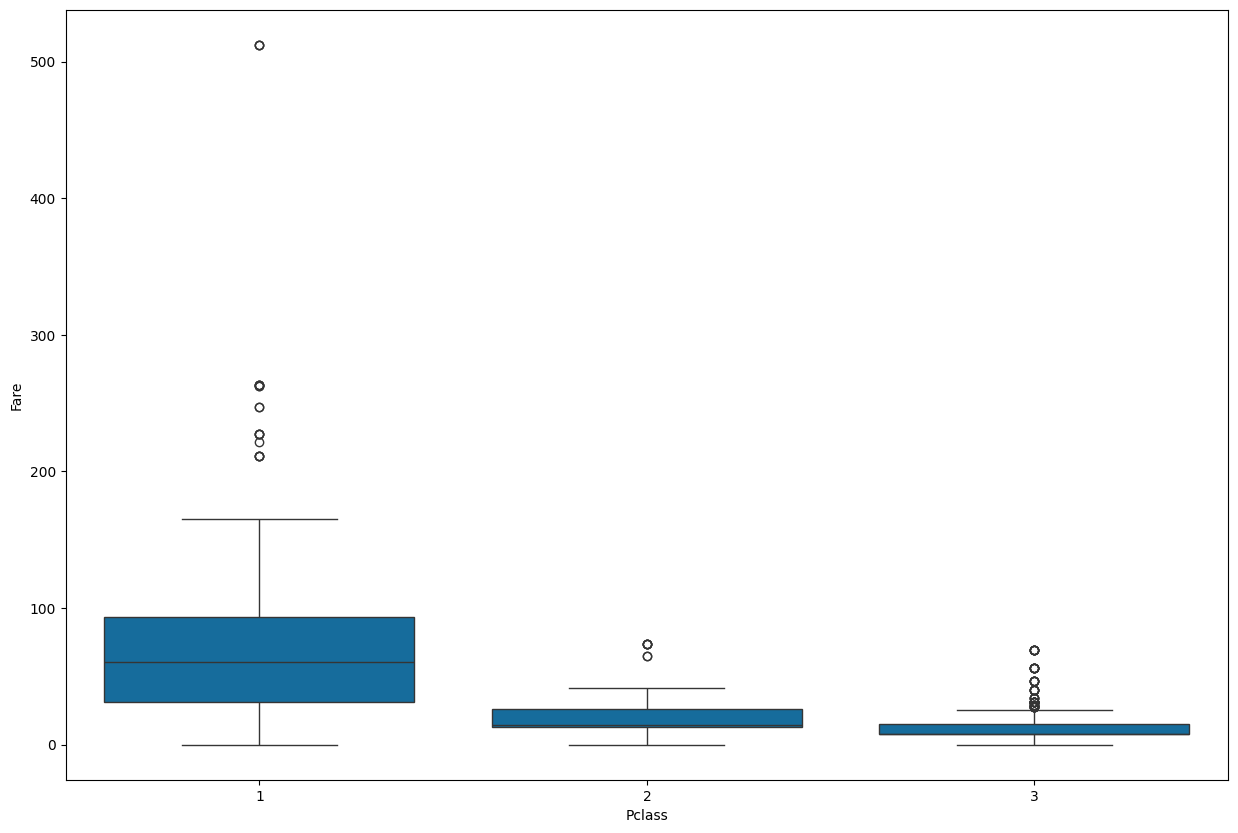

In [ ]:
discrete_var_boxplot(x='Pclass',y='Fare',data=data)


Count of Pclass by Age

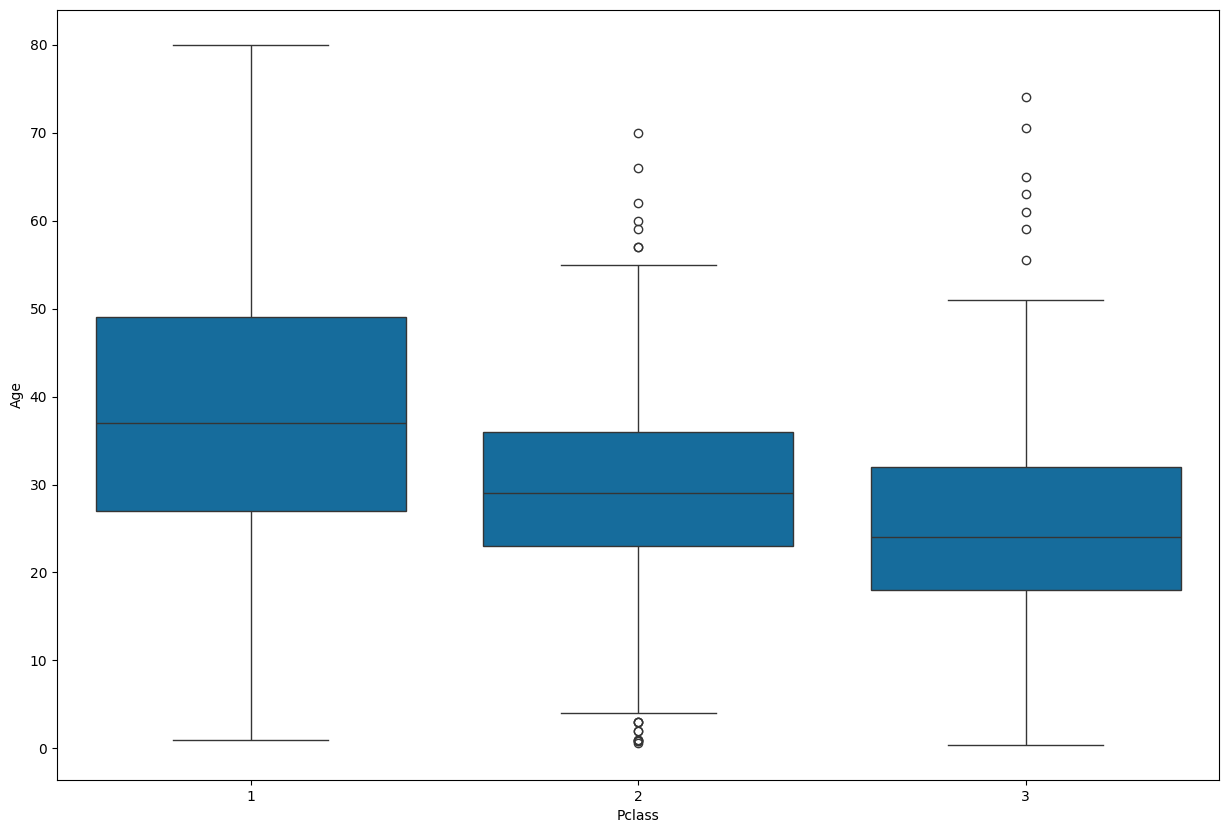

In [ ]:
discrete_var_boxplot(x='Pclass',y='Age',data=data)



Count of Age by Survived

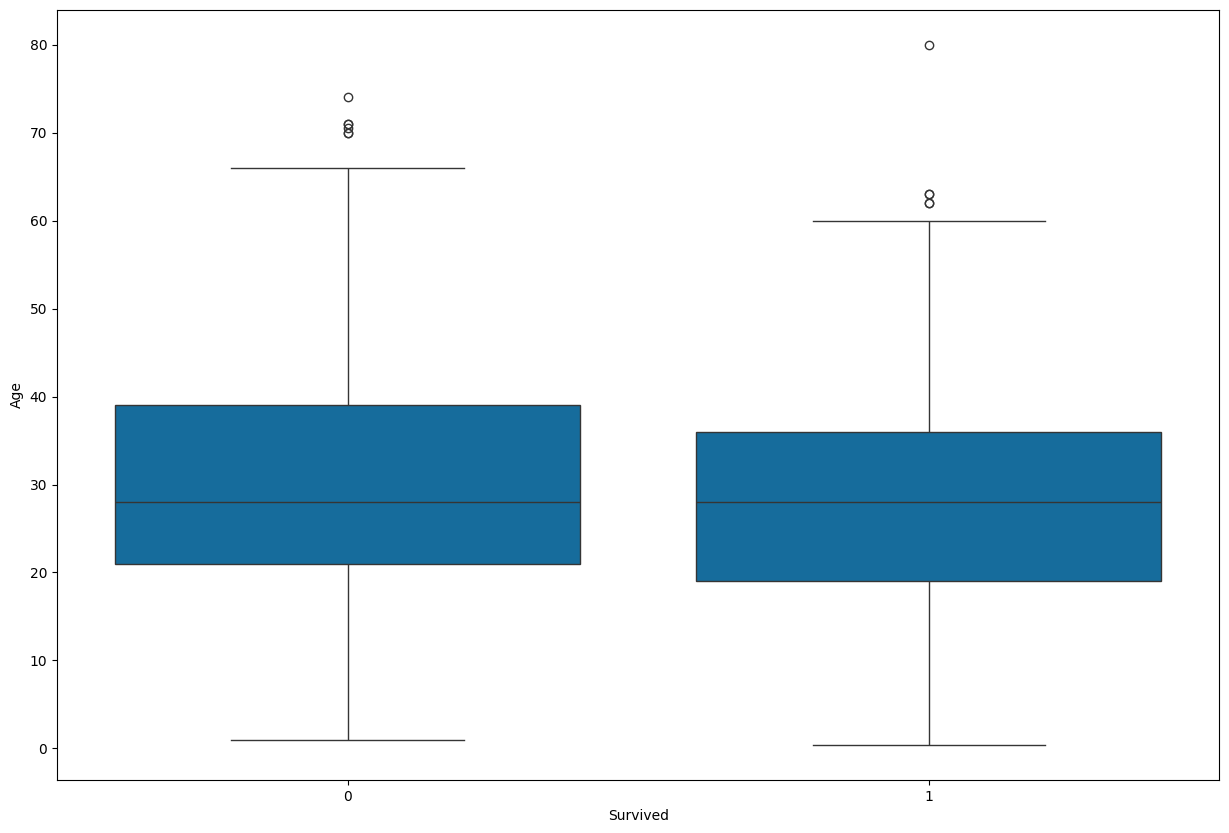

In [ ]:
discrete_var_boxplot(x='Survived',y='Age',data=data)


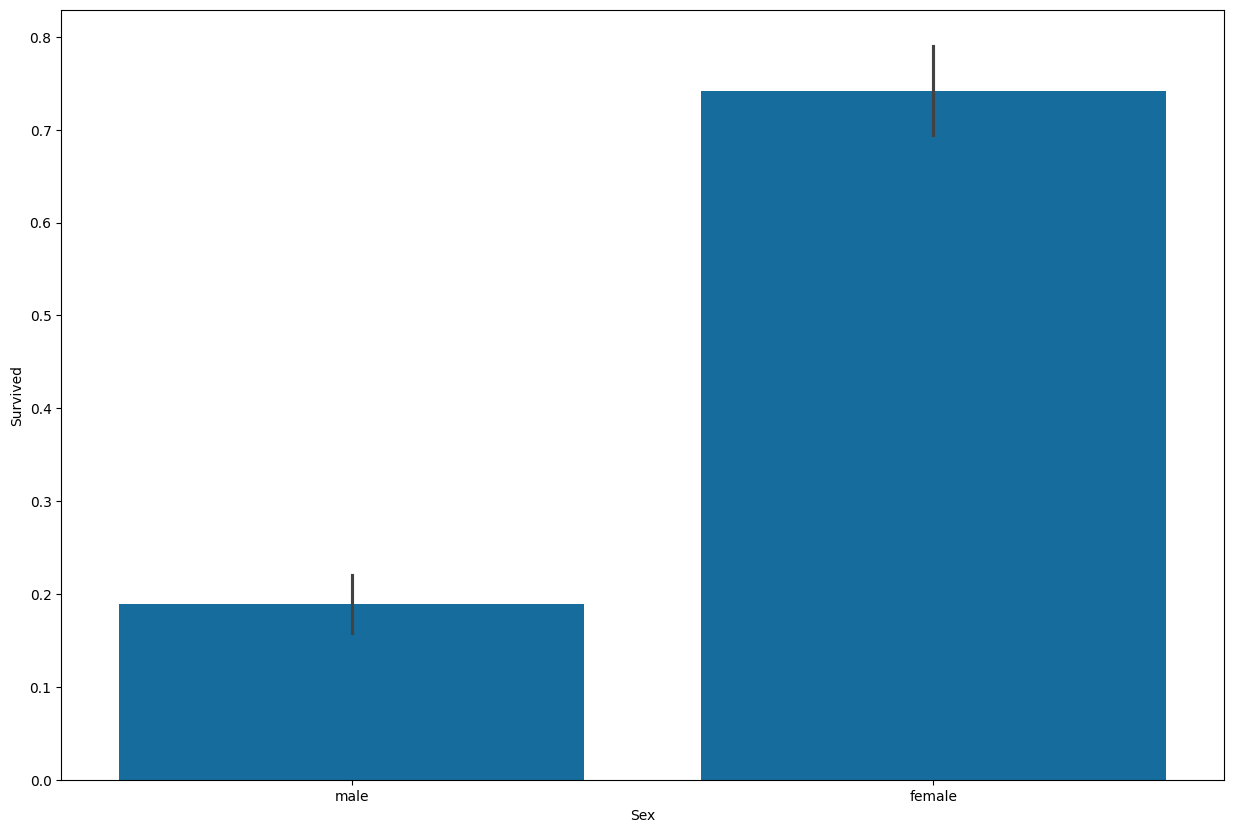

In [ ]:
discrete_var_barplot(x='Sex',y='Survived',data=data)

Insights
- The number of male is higher than the number of female
- Female has higher chance of surviving compared to male
- The age distribution is right-skewed with the mean of age being 29.699

#Data Preprocessing

cleaning.py

In [ ]:
import pandas as pd
import numpy as np
from warnings import warn

# 2018.11.07 Created by Eamon.Zhang


def check_missing(data,output_path=None):
    """
    check the total number & percentage of missing values
    per variable of a pandas Dataframe
    """

    result = pd.concat([data.isnull().sum(),data.isnull().mean()],axis=1)
    result = result.rename(index=str,columns={0:'total missing',1:'proportion'})
    if output_path is not None:
        result.to_csv(output_path+'missing.csv')
        print('result saved at', output_path, 'missing.csv')
    return result


def drop_missing(data,axis=0):
    """
    Listwise deletion:
    excluding all cases (listwise) that have missing values

    Parameters
    ----------
    axis: drop cases(0)/columns(1),default 0

    Returns
    -------
    Pandas dataframe with missing cases/columns dropped
    """

    data_copy = data.copy(deep=True)
    data_copy = data_copy.dropna(axis=axis,inplace=False)
    return data_copy


def add_var_denote_NA(data,NA_col=[]):
    """
    creating an additional variable indicating whether the data
    was missing for that observation (1) or not (0).
    """

    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i+'_is_NA'] = np.where(data_copy[i].isnull(),1,0)
        else:
            warn("Column %s has no missing cases" % i)

    return data_copy


def impute_NA_with_arbitrary(data,impute_value,NA_col=[]):
    """
    replacing NA with arbitrary values.
    """

    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i+'_'+str(impute_value)] = data_copy[i].fillna(impute_value)
        else:
            warn("Column %s has no missing cases" % i)
    return data_copy


def impute_NA_with_avg(data,strategy='mean',NA_col=[]):
    """
    replacing the NA with mean/median/most frequent values of that variable.
    Note it should only be performed over training set and then propagated to test set.
    """

    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            if strategy=='mean':
                data_copy[i] = data_copy[i].fillna(data[i].mean())
            elif strategy=='median':
                data_copy[i] = data_copy[i].fillna(data[i].median())
            elif strategy=='mode':
                data_copy[i] = data_copy[i].fillna(data[i].mode()[0])
        else:
            warn("Column %s has no missing" % i)
    return data_copy


def impute_NA_with_end_of_distribution(data,NA_col=[]):
    """
    replacing the NA by values that are at the far end of the distribution of that variable
    calculated by mean + 3*std
    """

    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i+'_impute_end_of_distri'] = data_copy[i].fillna(data[i].mean()+3*data[i].std())
        else:
            warn("Column %s has no missing" % i)
    return data_copy


def impute_NA_with_random(data,NA_col=[],random_state=0):
    """
    replacing the NA with random sampling from the pool of available observations of the variable
    """

    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i+'_random'] = data_copy[i]
            # extract the random sample to fill the na
            random_sample = data_copy[i].dropna().sample(data_copy[i].isnull().sum(), random_state=random_state)
            random_sample.index = data_copy[data_copy[i].isnull()].index
            data_copy.loc[data_copy[i].isnull(), str(i)+'_random'] = random_sample
        else:
            warn("Column %s has no missing" % i)
    return data_copy

HANDLING MISSING VALUE

Missing value count before handling

In [ ]:
check_missing(data=data)

,total missing,proportion
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,0.198653
SibSp,0,0.000000
Fare,0,0.000000


Handling missing value with median since it is less sensitive to outliers and wont cause major disruption to the dataset

In [ ]:
#Replacing Missing Value by median of that variable
print(data.Age.median())
data= impute_NA_with_avg(data=data,strategy='median',NA_col=['Age'])
data.head(50)

28.0


,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500
5,0,3,male,28.0,0,8.4583
6,0,1,male,54.0,0,51.8625
7,0,3,male,2.0,3,21.0750
8,1,3,female,27.0,0,11.1333
9,1,2,female,14.0,1,30.0708


Missing value count after handling

In [ ]:
check_missing(data=data)

,total missing,proportion
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Fare,0,0.0


ENCODING

Before Encoding

In [ ]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500
5,0,3,male,28.0,0,8.4583
6,0,1,male,54.0,0,51.8625
7,0,3,male,2.0,3,21.0750
8,1,3,female,27.0,0,11.1333
9,1,2,female,14.0,1,30.0708


Using One Hot Encoding because it is easy to represents and it ensures independence of other categories

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Encoder.fit(data['Sex'])
data['Sex'] = Encoder.transform(data['Sex'])

After Encoding

In [ ]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500
5,0,3,1,28.0,0,8.4583
6,0,1,1,54.0,0,51.8625
7,0,3,1,2.0,3,21.0750
8,1,3,0,27.0,0,11.1333
9,1,2,0,14.0,1,30.0708


NORMALIZE OR STANDARDIZE

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split


Min-max scaling is used to prevent features with larger scales to dominate others with smaller scales

In [ ]:
# Min-Max Scaling
data['Fare'] = (data['Fare'] - data['Fare'].min()) / (data['Fare'].max() - data['Fare'].min())

data['Age'] = (data['Age'] - data['Age'].min()) / (data['Age'].max() - data['Age'].min())

In [ ]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,0.271174,1,0.014151
1,1,1,0,0.472229,1,0.139136
2,1,3,0,0.321438,0,0.015469
3,1,1,0,0.434531,1,0.103644
4,0,3,1,0.434531,0,0.015713


Note: At the time I was using the columns that are picked Eamon.Zhang, hence I am still going to use the same columns

Splitting dataset into training set and test set (70:30)

In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop(columns = ['Survived']).values
y = data['Survived'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 42)
print(x_train)


[[1.         1.         0.04498618 0.         0.15977676]
 [3.         1.         0.34656949 0.         0.01541158]
 [3.         0.         0.00728826 1.         0.02173075]
 ...
 [3.         1.         0.50992712 2.         0.02753757]
 [1.         0.         0.17064589 1.         0.2342244 ]
 [1.         1.         0.25860769 0.         0.15085515]]


#Logistic Regression

In [ ]:
def sigmoid(input):
    return 1.0 / (1 + np.exp(-input))
# Gradient descent based logistic regression from scratch
def compute_prediction(X, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions

def update_weights_gd(X_train, y_train, weights, learning_rate):
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)
    m = y_train.shape[0]
    weights += learning_rate / float(m) * weights_delta
    return weights

def compute_cost(X, y, weights):
    predictions = compute_prediction(X, weights)
    cost = np.mean(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))
    return cost

def train_logistic_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    cost_history = [0] * max_iter
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)
        cost_history[iteration] = compute_cost(X_train, y_train, weights)
        # Check the cost for every 100 (for example) iterations
        if iteration % 1000 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights, cost_history

def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)


Prediction

In [ ]:
weights, cost = train_logistic_regression(x_train,y_train,max_iter = 10000,learning_rate = 0.5,fit_intercept=True)
print("Weight: ",weights)

prediction = predict(x_test,weights)

print(prediction.shape)
print(prediction)

0.6255723502917475
0.45806027786844417
0.4560870504783608
0.45589746183909446
0.45587747952263563
0.45587521317021257
0.4558749105600113
0.4558748529748575
0.4558748362477564
0.45587483001867396
Weight:  [ 4.30910679 -0.95227484 -2.59584478 -2.75228918 -0.33049791  1.57499064]
(268,)
[0.08462907 0.22853114 0.14229259 0.90994959 0.66522719 0.93787928
 0.6276732  0.09211664 0.71854787 0.94240714 0.33818386 0.06748135
 0.3977661  0.10485743 0.20070975 0.94974661 0.30027222 0.6277301
 0.25528945 0.33400335 0.12621935 0.420977   0.62324317 0.14278103
 0.11376508 0.08466307 0.37222674 0.22988895 0.10219211 0.60319905
 0.14655476 0.67475234 0.4753929  0.6275295  0.15099441 0.08715325
 0.47907747 0.6276732  0.9190197  0.11173413 0.20782357 0.08011062
 0.11178119 0.11168965 0.48872926 0.12929318 0.14665573 0.13054634
 0.12593286 0.29272199 0.66643163 0.82198666 0.05968285 0.60670417
 0.03378893 0.95228791 0.22249092 0.91705739 0.78128305 0.69718137
 0.13806873 0.88385175 0.76854762 0.4717366  0

Text(0.5, 1.0, 'ERROR vs. TRAINING ITERATIONS')

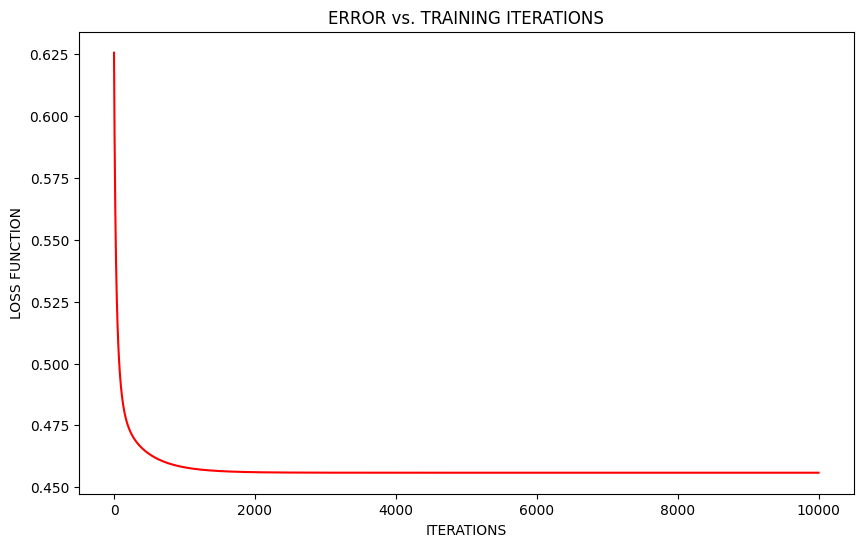

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.arange(10000), cost, 'r')
ax.set_xlabel('ITERATIONS')
ax.set_ylabel('LOSS FUNCTION')
ax.set_title('ERROR vs. TRAINING ITERATIONS')

Converting into 0 or 1 based on:
*   1 if >=0.5
*   0 if < 0.5





In [ ]:
prediction = (prediction>=.5).astype(int)
prediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

Evaluation with accuracy, precision, recall, f1score

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy: ",accuracy_score(y_test,prediction))
print("Precision: ",precision_score(y_test,prediction))
print("Recall: ",recall_score(y_test,prediction))
print("F1 Score: ",f1_score(y_test,prediction))

Accuracy:  0.8022388059701493
Precision:  0.79
Recall:  0.7117117117117117
F1 Score:  0.7488151658767773


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_Matrix = confusion_matrix(y_test,prediction)
print(confusion_Matrix)

[[136  21]
 [ 32  79]]


Based on the confusion matrix above, there are:
*   79 true positive data
*   136 true negative data
*   21 false positive data
*   32 false negative data

This basically means there are 136 + 80 data that is correctly predicted and the rest is incorrectly predicted.


Comparing with Logistic Regression from Sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
sk_prediction = model.predict(x_test)

#Evaluation

print("Evaluation of Logistic Regression from sklearn")
print("Accuracy: ",accuracy_score(y_test,sk_prediction))
print("Precision: ",precision_score(y_test,sk_prediction))
print("Recall: ",recall_score(y_test,sk_prediction))
print("F1 Score: ",f1_score(y_test,sk_prediction))
print("\n")
print("Evaluation of Logistic Regression from scratch")
print("Accuracy: ",accuracy_score(y_test,prediction))
print("Precision: ",precision_score(y_test,prediction))
print("Recall: ",recall_score(y_test,prediction))
print("F1 Score: ",f1_score(y_test,prediction))


Evaluation of Logistic Regression from sklearn
Accuracy:  0.8059701492537313
Precision:  0.7920792079207921
Recall:  0.7207207207207207
F1 Score:  0.7547169811320755


Evaluation of Logistic Regression from scratch
Accuracy:  0.8022388059701493
Precision:  0.79
Recall:  0.7117117117117117
F1 Score:  0.7488151658767773


In [ ]:
print("Confusion Matrix of Logistic Regression from sklearn")
print(confusion_matrix(y_test,sk_prediction))
print("\n")

print("Confusion Matrix of Logistic Regression from scratch")
print(confusion_matrix(y_test,prediction))
print("\n")


Confusion Matrix of Logistic Regression from sklearn
[[136  21]
 [ 31  80]]


Confusion Matrix of Logistic Regression from scratch
[[136  21]
 [ 32  79]]


